In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import random
from matplotlib import pyplot as plt
import sklearn as sk
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

#download data
mnist = fetch_openml('mnist_784')

/home/jakub/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jakub/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jakub/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jakub/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: Futu

In [4]:
labels = pd.Series(mnist.target).astype('int').astype('category')
images = pd.DataFrame(mnist.data)
del mnist

In [29]:

#shuffle input data
images['label'] = labels
images.reindex(np.random.permutation(images.index))
labels = images['label']
images.drop('label', axis=1, inplace=True)

images.columns = ['pixel_'+str(x) for x in range(images.shape[1])]

print(f'min: {images.values.min()}\nmax: {images.values.max()}\nmean: {images.values.mean()}\n')
print('Occurences of each label')
print(labels.value_counts(normalize=True))
images.describe()

min: 0.0
max: 255.0
mean: 33.385964741253645

Occurences of each label
1    0.112529
7    0.104186
3    0.102014
2    0.099857
9    0.099400
0    0.098614
6    0.098229
8    0.097500
4    0.097486
5    0.090186
Name: label, dtype: float64


,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


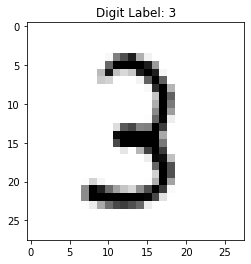

In [6]:
# 784 columns correspond to 28x28 image
random_sample = random.randrange(0, 70000)
plottable_image = np.reshape(images.loc[random_sample,:].values, (28, 28))

# Plot the image
plt.imshow(plottable_image, cmap='gray_r')
plt.title('Digit Label: {}'.format(labels[random_sample]))
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, stratify=labels, test_size=0.2)
X_train, X_test = X_train / 255.0, X_test / 255.0 # normalize values
X_train.shape


(56000, 784)

In [8]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs=1, n_estimators=10)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [28]:
print('Test accuracy')
prediction = rfc.predict(X_test)

sk.metrics.accuracy_score(prediction, y_test)

Test accuracy


0.9478571428571428